Author: Ella Xiaoyu Wan 
@ Email: xwan3@u.rochester.edu

# Problem Statement

Consumer behaviors offered insights into the demands of the market and web analytics provided fast and clear results that gauge e-commerce growth strategy. <br> 


- The goal of analysis is to ***generate business insights on consumer revenue generated behavior and predict whether the consumer visit leads to the purchase of items***.


# Variable Descriptions

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories <br> 

"Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. <br>

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8 <br>

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is a weekend, and month of the year <br>


![image](https://lh3.googleusercontent.com/proxy/V50bO0IhtAxLfTYx9mQNVI32KqKbeKnHuXozVIC03C5J9TBGlHedwQhS4TZTheyeMd9av5DhH5SsGbBZu23HjEhzvIViZVCsMzcHygkiNti2nbSW99r3U3S4WUt2WL0lCbWsavD_CJFx0Irxev_ZuqMeVxHTIphXfw)

### Import Packages

In [3]:
import numpy as np   # vector calculation 
import pandas as pd  # dataframe
from scipy import stats
import math
# plotting 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
%matplotlib inline

from sklearn import preprocessing 
import warnings
import os
warnings.filterwarnings('ignore')

plt.rc('font', size= 14)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize
plt.rc('figure', titlesize=16) 

# Load Data and Overview

In [4]:
df = pd.read_csv("./online_shoppers_intention.csv")

In [5]:
print("The data contains {0} instances and {1} features".format(df.shape[0], df.shape[1]))
print("The total missing values: {}".format(df.isnull().sum().sum()))
print("The unique values of all data are {}".format(df.nunique().sum()))
# print("The data covers the time range from {0} to {1}".format(df["Month"].min(), df["Month"].max()))

The data contains 12330 instances and 18 features
The total missing values: 0
The unique values of all data are 23925


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [6]:
# random sample 10 entries for a view 
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5006,5,237.250000,0,0.0,12,454.226191,0.011765,0.042647,0.0,0.0,May,1,1,8,3,Returning_Visitor,True,False
4645,6,1279.500000,0,0.0,72,1032.761905,0.000000,0.001389,0.0,0.0,May,2,4,1,3,New_Visitor,False,False
5907,0,0.000000,0,0.0,4,1623.666667,0.133333,0.140833,0.0,0.0,Aug,1,1,1,3,Returning_Visitor,False,False
6052,1,6.000000,0,0.0,23,2767.200000,0.000000,0.008333,0.0,0.0,Sep,2,2,7,1,New_Visitor,False,False
999,0,0.000000,0,0.0,15,1074.428571,0.015385,0.021538,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
840,3,60.000000,0,0.0,19,494.500000,0.000000,0.010000,0.0,0.0,Mar,1,1,3,9,Returning_Visitor,True,False
7818,4,97.800000,0,0.0,53,1228.289524,0.023457,0.042027,0.0,0.0,Aug,1,1,2,3,Returning_Visitor,False,False
10429,0,0.000000,0,0.0,8,183.000000,0.000000,0.006250,0.0,0.0,Dec,2,4,4,1,Returning_Visitor,False,False
7114,5,56.733333,1,14.6,37,1123.993333,0.000697,0.022648,0.0,0.0,Oct,2,2,3,2,Returning_Visitor,False,False
11655,4,91.000000,0,0.0,20,537.625000,0.000000,0.010000,0.0,0.0,Dec,8,13,9,20,Other,False,False


In [7]:
# Check duplicated samples-Misleading duplicated samples
df[df.duplicated()].sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
974,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
5038,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,3,2,3,3,Returning_Visitor,False,False
3577,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,2,2,1,4,Returning_Visitor,False,False
4913,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.8,May,2,2,1,1,Returning_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
3721,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,4,3,Returning_Visitor,False,False
10841,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
1390,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
10795,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Nov,1,1,4,1,Returning_Visitor,False,False


In [8]:
# descriptive analysis of numerical variables 
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
# check missing value of each variable 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

***Findings***: <br>
1) 1-year e-commerce website data with 12330 entries and 18 variables <br> 
2) 8 Categorical variables: ```Month```, ```OperatinSystems```, ```Browswer```, ```Region```, ```TrafficType```, ```VisitorType```, ```Weekend (bool)```, ```Revenue(bool)(label)```. <br>
4) No missing value and no duplicated entries identified. <br>

***Actions***: <br>
1) Categorical variable transformation <br>
2) Given the wide range of numerical varialbes, consider the standarlization/normalization. <br>
3) Check the distribution of output variable for the class balance  <br>
4) Check the numerical variables distribution <br>

# Exploratory Data Analysis (EDA)

![image](./flow.png)

## Univariate Analysis 

### Helper Functions

In [31]:
def draw_plot(data, feature, plot_type ="barplot",  fig_width = 6, fig_height = 4, dpi = 80, color = "dodgerblue", 
              horizontal = False, top = False, log = False):
    """
    The function is used to analyze frequency and distribution of either categorical or numerical variables. 
    input:
    data(data_frame): the input dataframe 
    feature(str): the feature to be plotted
    plot_type(str): options include barplot, density plot, piechart and boxplot  
    horizontal(bool): if True, the figure will be horizontal will be y-axis else horizontal is x-axis. 
    fig_width(int):the width of the figure. 
    fig_height(int):the height of the figure.
    dpi(int): the resolution of the figure.
    color(str): color of the figure. 
    
    output:
    barplot/density/piechart of the variable distributions. 
    """
   
    # set figure size 
    plt.figure(figsize = (fig_width,fig_height), dpi = dpi)
    # value_counts of features 
    feature_cnt = data[feature].value_counts()
    
    # barplot 
    if plot_type == "barplot":
        if top: 
            fc = feature_cnt.sort_values(ascending = False)
        else:
            fc = feature_cnt.sort_values(ascending = True)                  
    
        # position of figure 
        if horizontal: 
            ax = sns.barplot(x = fc.values, y = fc.index, alpha = 1.0, color = color)
        else:
            ax = sns.barplot(x = fc.index, y = fc.values, alpha = 1.0, color = color)
       
    # piechart 
    if plot_type == "piechart":
        
        fc_label = feature_cnt.sort_values(ascending= False).index
        fc_count = feature_cnt.sort_values(ascending= False)
        
        pie = plt.pie(fc_count, labels = fc_label, autopct='%1.1f%%', shadow= False)
    
    # density plot 
    if plot_type == "density":
        ax = sns.distplot(data[feature], color = color, hist = True, kde = True)
    
    if plot_type == "boxplot":
        if log:
            ax = sns.boxplot(x=df[feature])
        else:    
            ax = sns.boxplot(x = df[feature].apply(lambda x: math.log(x+1)))
        
    # figure style
    sns.set_style("whitegrid")   
    plt.title('Distribution of {}'.format(feature),fontsize = 12)
    plt.ylabel("", fontsize = 10)
    plt.xlabel("{}".format(feature),fontsize = 10)
#     plt.legend()
    plt.show()

def var_percentage(data, label):
    """
    The function is to check the percentage of count.
    input:
    data(data_frame): the input dataframe 
    labels(str): the variable to be plotted
    
    output:
    barplot of label distributions
    """
    labels = pd.DataFrame(data[label].value_counts().sort_values(ascending = False))
    labels["Percentage"] = labels[label].apply(lambda x: round((100*x / sum(labels[label].values)),2))
    return (labels)

### Categorical Variables

#### `Revenue`

In [83]:
var_percentage(df, "Revenue")

,Revenue,Percentage
False,10422,84.53
True,1908,15.47


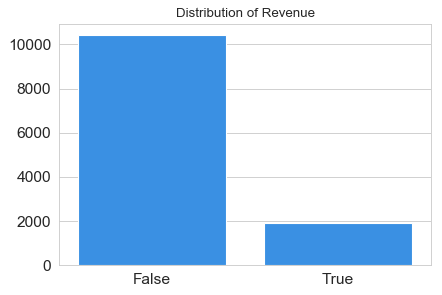

In [84]:
draw_plot(df, "Revenue", plot_type= "barplot" )

#### `VisitorType` 

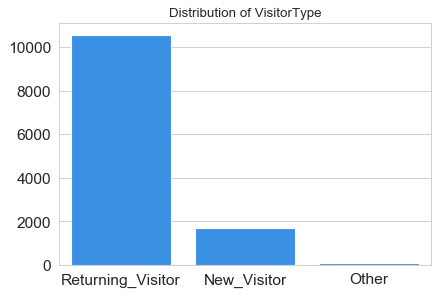

In [85]:
draw_plot(df, "VisitorType", plot_type= "barplot" )

In [107]:
var_percentage(df,"VisitorType")

,VisitorType,Percentage
Returning_Visitor,10551,85.57
New_Visitor,1694,13.74
Other,85,0.69


#### `Weekend` 

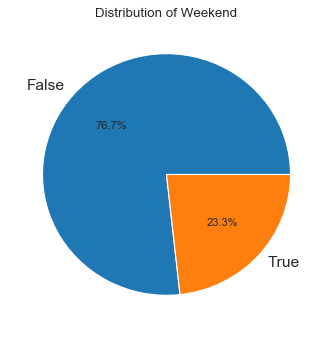

In [82]:
draw_plot(df, "Weekend", plot_type= "piechart",  fig_width = 5, fig_height = 5)

#### `Month` 

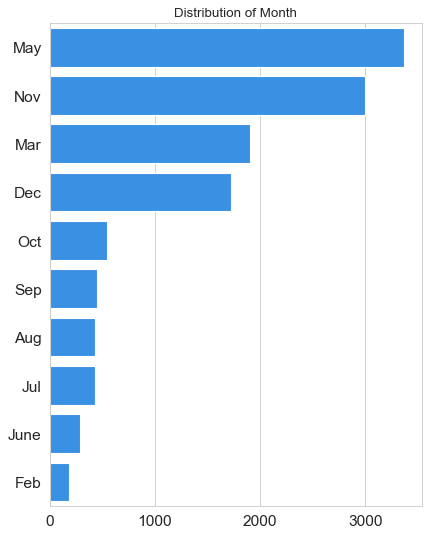

In [86]:
draw_plot(df, "Month", plot_type= "barplot",fig_width = 6, fig_height = 8, horizontal = True)

#### `Region`

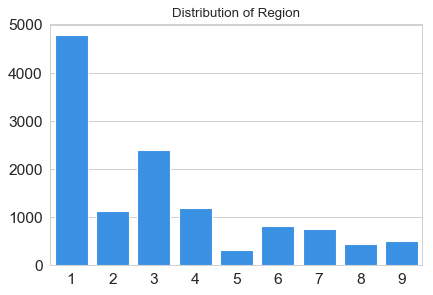

In [74]:
draw_plot(df, "Region", plot_type= "barplot",fig_width = 6, fig_height = 4, horizontal = False)

#### `TrafficType`

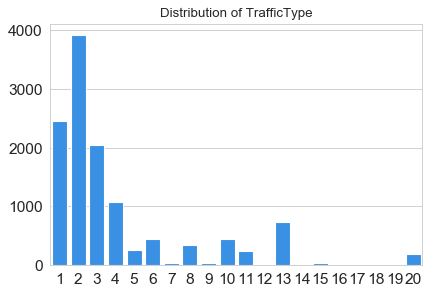

In [110]:
draw_plot(df, "TrafficType", plot_type= "barplot",fig_width = 6, fig_height = 4, horizontal = False)

***Findings***: <br>
In the data collected, 
1) Visitor: The majority of visitors are returning_Visitor, which takes 85.57% all visitors. <br> 
2) Month: The most data collected are in May and November, consiting of 27.28% and 24.31% of all data. <br>
3) Weekend: Most user activities occured during weekdays (76.74%) instead of weekend. <br>
4) Most customers come from browser 1, operating systems 1 , region 1 and traffictype 2. 

### Continuous Variables

#### ``Administrative_Duration``

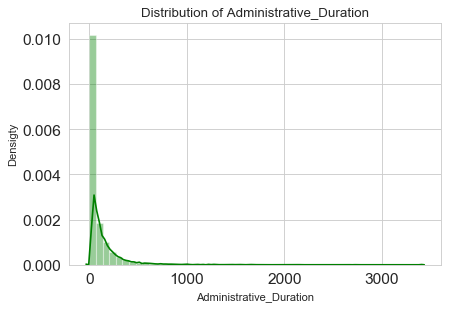

In [113]:
draw_plot(df, "Administrative_Duration", plot_type= "density", color="green")

#### ``Informational_Duration``

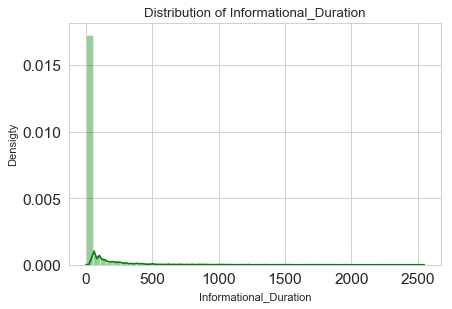

In [114]:
draw_plot(df, "Informational_Duration", plot_type= "density", color="green")

#### ``ProductRelated_Duration``

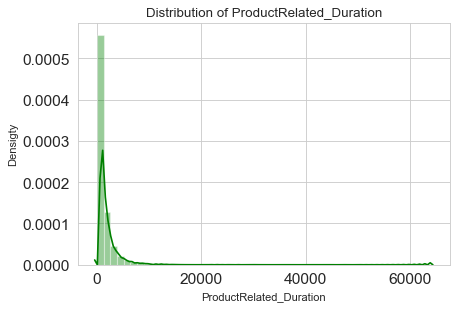

In [115]:
draw_plot(df, "ProductRelated_Duration", plot_type= "density", color="green")

In [19]:
count = ["Administrative", "Informational", "ProductRelated"]
duration = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration" ]

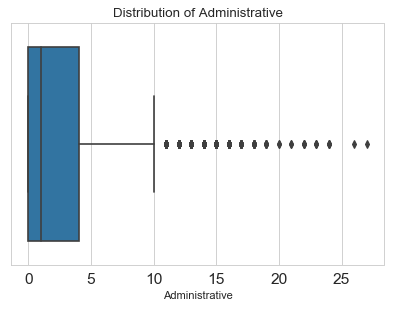

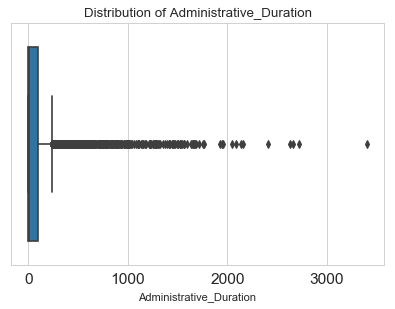

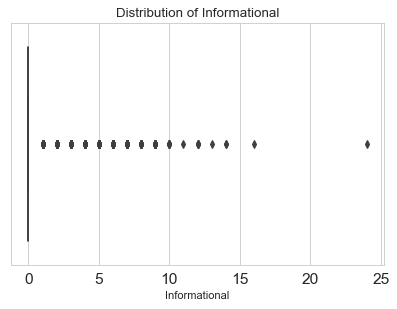

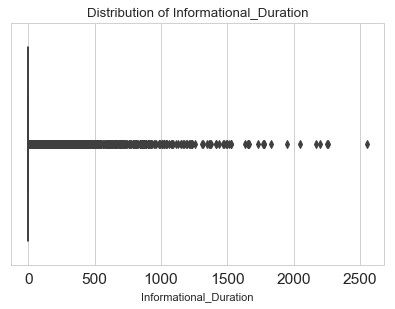

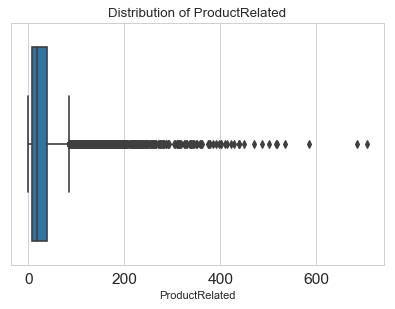

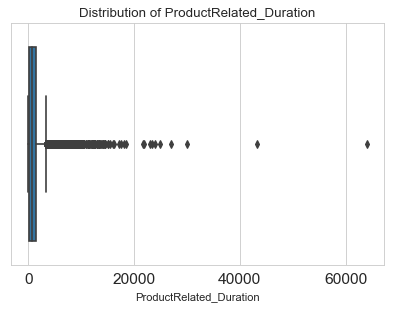

In [33]:
for i in range(1, len(count)+1):
    draw_plot(df, count[i-1], plot_type= "boxplot", log = True)
    draw_plot(df, duration[i-1], plot_type= "boxplot", log = True)

#### ``BounceRates``

In [29]:
google_var = ["BounceRates","ExitRates","PageValues"]
google_rate = df[google_var].mean()

In [483]:
google_rate

BounceRates    0.022191
ExitRates      0.043073
PageValues     5.889258
dtype: float64

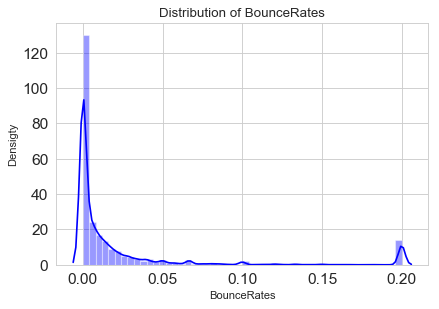

In [116]:
draw_plot(df, "BounceRates", plot_type= "density", color="blue")

#### ``ExitRates``

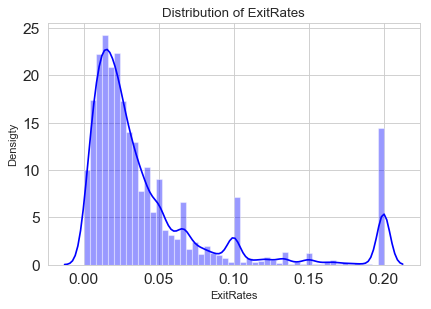

In [117]:
draw_plot(df, "ExitRates", plot_type= "density", color="blue")

#### ``PageValues``

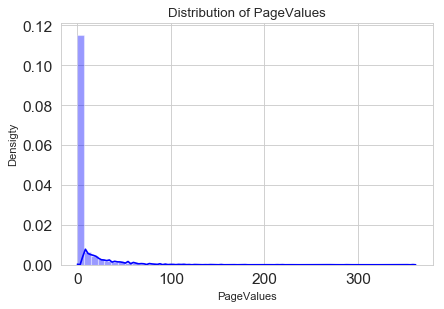

In [118]:
draw_plot(df, "PageValues", plot_type= "density", color="blue")

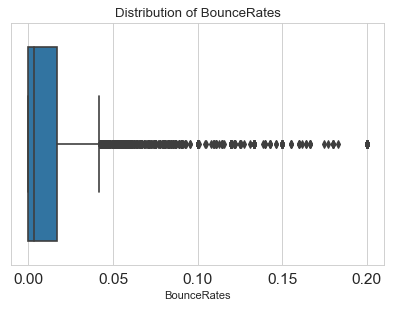

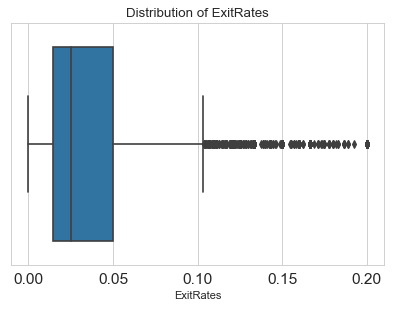

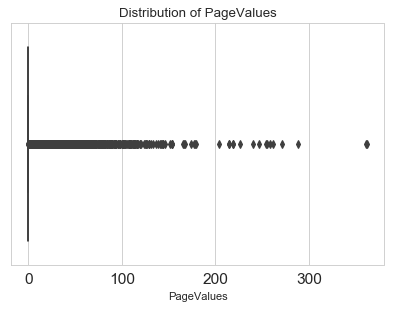

In [32]:
for i in range(1, len(count)+1):
    draw_plot(df, google_var[i-1], plot_type= "boxplot", log = True)

# Bivariate Analysis 

### helper function  

In [74]:
def draw_biplot(data, x_var, y_var, plot_type, color, palette, fig_width = 8, fig_height = 5, \
                dpi = 100, title = None):
    """
    The function is used to analyze frequency and distribution of either categorical or numerical variables. 
    input:
    data(data_frame): the input dataframe 
    x_var(str): the feature to be plotted in x_axis
    y_var(str): 
    plot_type(str): options include barplot, density plot, piechart.  
    horizontal(bool): if True, the figure will be horizontal will be y-axis else horizontal is x-axis. 
    fig_width(int):the width of the figure. 
    fig_height(int):the height of the figure.
    dpi(int): the resolution of the figure.
    color(str): color of the figure. 
    
    output:
    barplot/density/piechart of the variable distributions. 
    """
   
    # set figure size 
    plt.figure(figsize = (fig_width,fig_height), dpi = dpi)
    
    # barplot 
    if plot_type == "barplot":
        if color: 
            ax = sns.barplot(x= x_var, y= y_var, data= data, color = color)
        if palette:
            ax = sns.barplot(x= x_var, y= y_var, data= data, palette = palette)
    
    # piechart 
    if plot_type == "piechart":
        
        freq_tb = data[feature].groupby(data.Revenue).value_counts()
        print(freq_tb)
        freq_tb = freq_tb.unstack(level='Revenue').fillna(0).transpose()
        print(freq_tb)
        plt.pie(freq_tb.iloc[0,:], labels=freq_tb.columns,
                autopct='%1.1f%%', shadow=False, colors = colors)
    
#     # density plot 
#     if plot_type == "density":
#         ax = sns.distplot(data[feature], color = color, hist = True, kde = True)
        
    # figure style
    sns.set_style("whitegrid")
    if title:
        plt.title(title, fontsize = 12)  
    else: 
        plt.title('Sessions vs {}'.format(x_var),fontsize = 12)
        
    plt.ylabel("Count", fontsize = 10)
    plt.xlabel("{}".format(x_var),fontsize = 10)
#     plt.legend()
    plt.show()

In [284]:
def bivar(data, var1, var2):
    df = pd.crosstab(data[var1], data[var2])
    df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (12, 6), color = ['dodgerblue', 'skyblue'])
    plt.title('{} by Revenue'.format(var1), fontsize = 20)
    plt.legend()
    plt.ylabel("Ratio",fontsize = 18)
    plt.xlabel("{}".format(var2),fontsize = 18)
    plt.axis()
    plt.xticks(rotation=0, fontsize = 18)
    plt.show()

![formula](./formula.png)

In [41]:
label = preprocessing.LabelEncoder()
df["Revenue_t"]  = label.fit_transform(df["Revenue"])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,month_no,Revenue_t
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False,12,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False,11,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False,11,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False,11,0


## Categorical Variable vs Revenue 

### VisitorType vs Revenue 

In [34]:
ct = pd.crosstab(df.VisitorType, df.Revenue)
ct.div(ct.sum(1).astype(float), axis = 0)

Revenue,False,True
VisitorType,,
New_Visitor,0.750885,0.249115
Other,0.811765,0.188235
Returning_Visitor,0.860677,0.139323


####  Sessions/Conversion vs Visitor

In [94]:
visitor_total= df.groupby("VisitorType").Revenue_t.count()
visitor_tran = df.query("Revenue_t == 1").groupby("VisitorType").count().Revenue_t
visitor_conv = visitor_tran / visitor_total
temp_vis = pd.concat( [visitor_total, visitor_tran, visitor_conv],axis = 1).reset_index()
temp_vis.columns = ["VisitorType", "Total_session", "Transactions","Conversion rate"]
temp_vis

,VisitorType,Total_session,Transactions,Conversion rate
0,New_Visitor,1694,422,0.249115
1,Other,85,16,0.188235
2,Returning_Visitor,10551,1470,0.139323


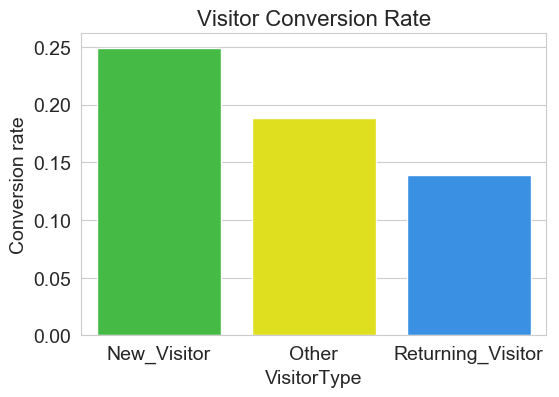

In [97]:
plt.figure(figsize=(6,4), dpi = 100)
plt.title("Visitor Conversion Rate")
color = ["limegreen", "yellow", "dodgerblue"]
sns.barplot(x="VisitorType", y="Conversion rate", 
            data=temp_vis, palette = color)

### Month vs Revenue 

In [57]:
# Here the month is presented in an unordered way 
# Transformation of monthly order 

df["Month"].replace("June","Jun", inplace= True)
# genrate a new feature
df["month_no"] = pd.to_datetime(df.Month, format='%b', errors='coerce').dt.month
# select the columns 
df_month = df.filter(["Month", "month_no","Revenue_t"], axis = 1)
# order 
df_month.sort_values(by = "month_no", ascending= True, inplace= True)
df_count = pd.DataFrame(df_month.groupby("month_no").Revenue_t.count()).reset_index()
index = pd.DataFrame(df_month.Month.unique())
tmp = pd.concat([index, df_count], axis = 1)
# rename the columns
tmp.columns = ["Month","month_no","session"]
# calculate the monthly sessions 
monthly_sessions = pd.DataFrame(df.groupby("Month").Revenue_t.count())
monthly_trans = pd.DataFrame(df.query("Revenue_t == 1").groupby("Month").count().Revenue_t)
# calculate the monthly conversion rate 
monthly_conversion = pd.DataFrame(monthly_trans / monthly_sessions)
temp = pd.concat([monthly_trans, monthly_sessions, monthly_conversion], axis = 1).reset_index()
temp.columns = ["Months","trans", "session","Conversion rate"]

####  Monthly Sessions

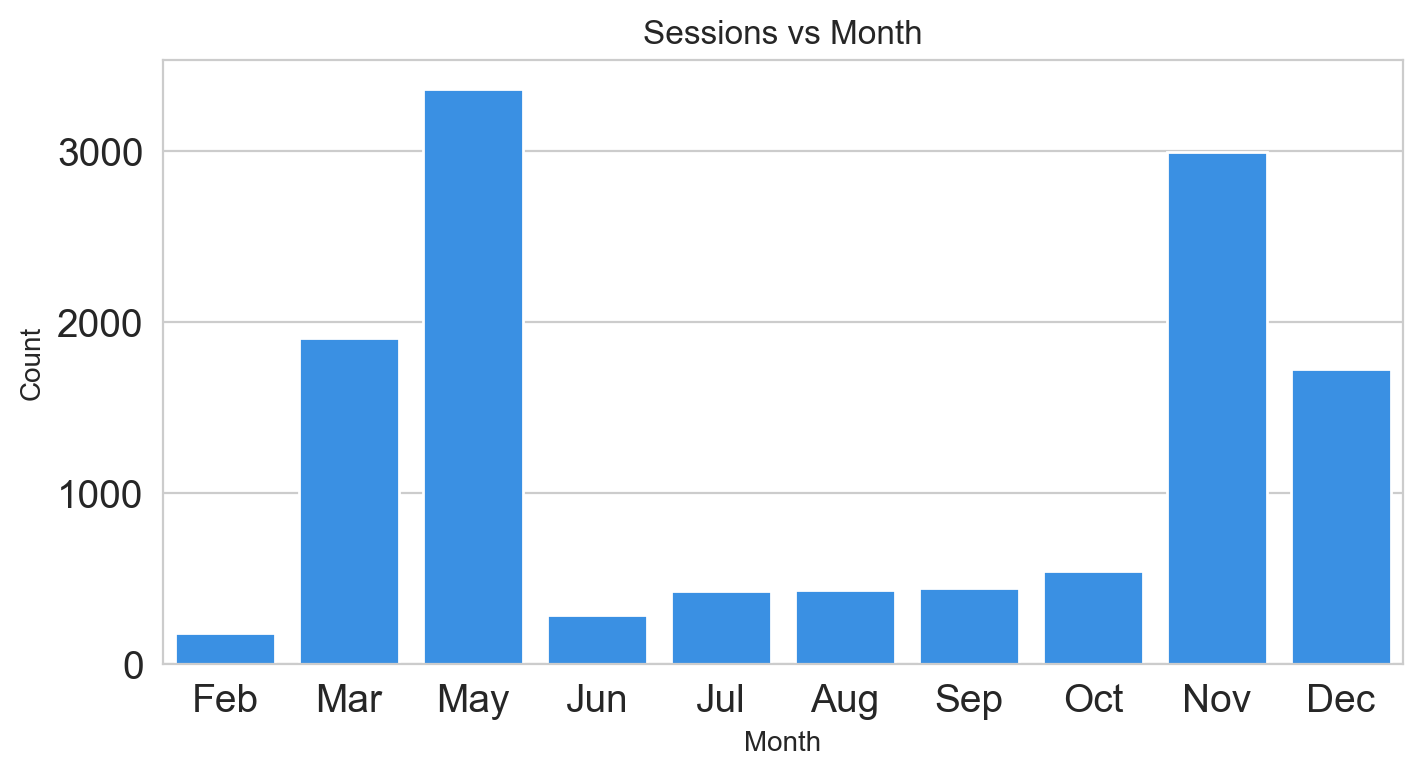

In [62]:
color = "dodgerblue"
draw_biplot(tmp, x_var= "Month", y_var="session", plot_type= "barplot", fig_width= 8, fig_height= 4, color = color, dpi = 200)

#### Monthly Conversion

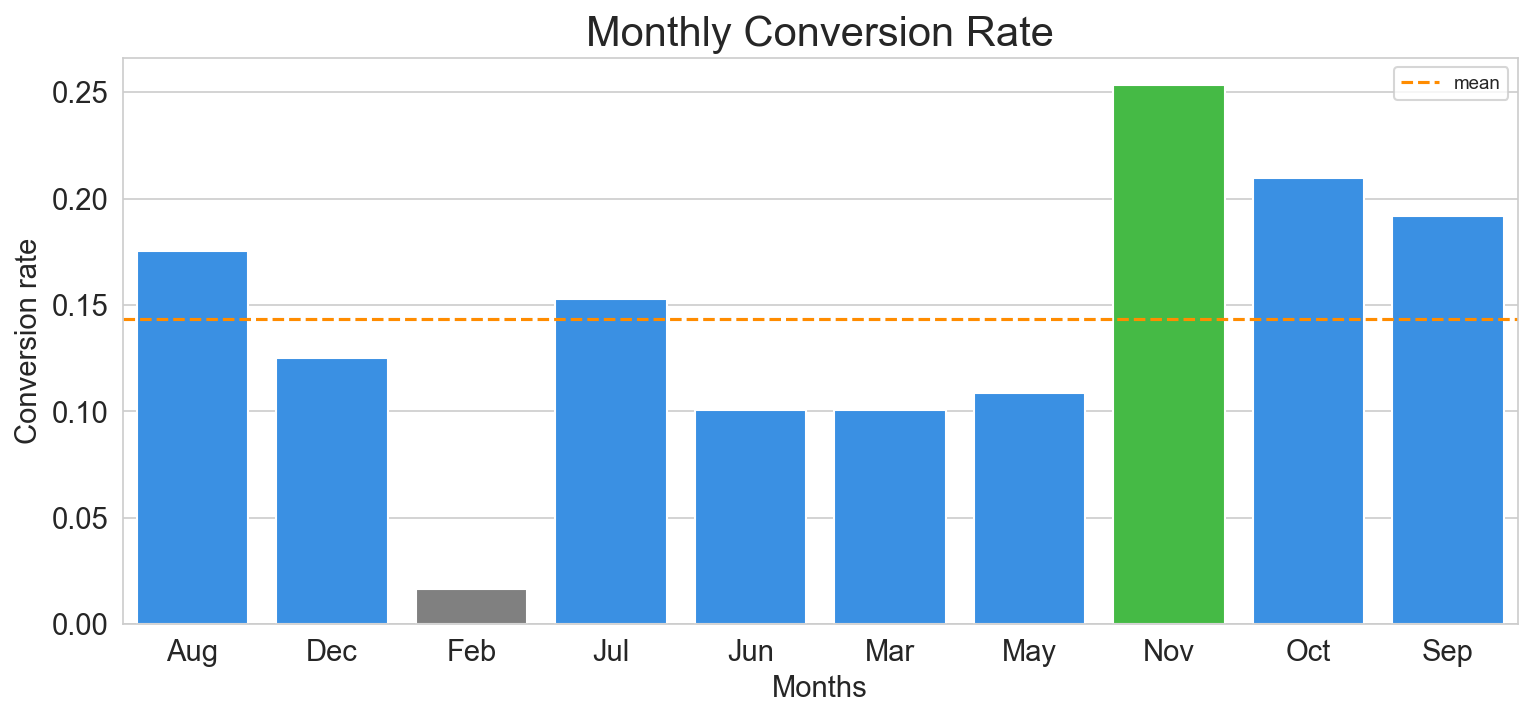

In [82]:
colors = ['limegreen' if x == max(temp['Conversion rate']) else 'gray' if x == min(temp['Conversion rate']) else 'dodgerblue' for x in temp['Conversion rate']]
plt.figure(figsize=(12,5), dpi = 150)
plt.title("Monthly Conversion Rate",fontsize = 20)
colors = ['limegreen' if x == max(temp['Conversion rate']) else 'gray' if x == min(temp['Conversion rate']) else 'dodgerblue' for x in temp['Conversion rate']]
sns.barplot(x="Months", y="Conversion rate", 
            data=temp, palette= colors)
plt.axhline(y=temp['Conversion rate'].mean(), color='darkorange',linewidth = 1.5, linestyle='--', label='mean')
plt.legend()

### Region vs Revenue 

In [102]:
region_total= df.groupby("Region").Revenue_t.count()
region_tran = df.query("Revenue_t == 1").groupby("Region").count().Revenue_t
region_conv = region_tran / region_total
temp_region = pd.concat([region_total,region_tran,region_conv],axis = 1).reset_index()
temp_region.columns = ["Region","Total_session", "Transactions","Conversion rate"]

In [103]:
temp_region

,Region,Total_session,Transactions,Conversion rate
0,1,4780,771,0.161297
1,2,1136,188,0.165493
2,3,2403,349,0.145235
3,4,1182,175,0.148054
4,5,318,52,0.163522
5,6,805,112,0.139130
6,7,761,119,0.156373
7,8,434,56,0.129032
8,9,511,86,0.168297


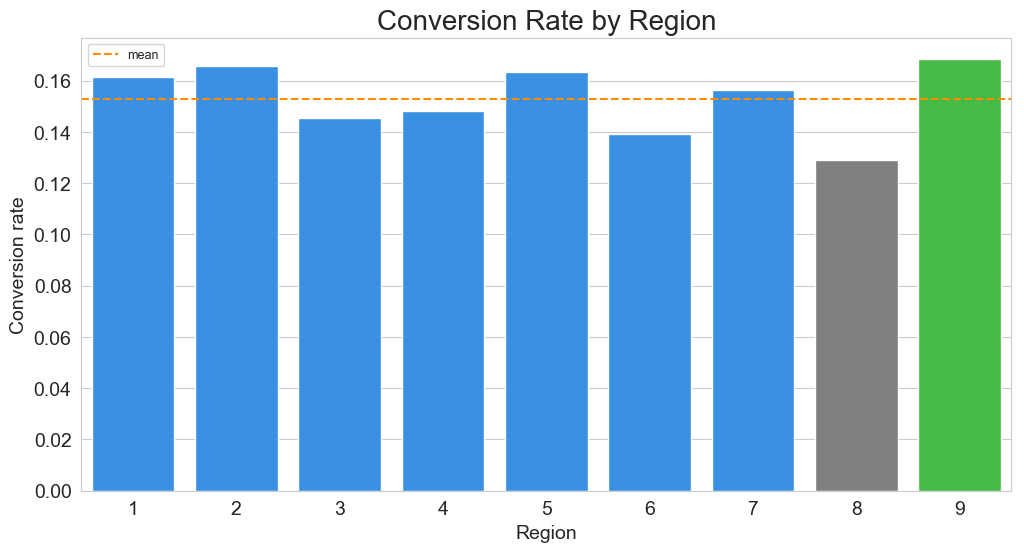

In [104]:
plt.figure(figsize=(12,6), dpi = 100)
plt.title("Conversion Rate by Region", fontsize = 20)
colors = ['limegreen' if x == max(temp_region['Conversion rate']) else 'gray' if x == min(temp_region['Conversion rate']) else 'dodgerblue' for x in temp_region['Conversion rate']]
sns.barplot(x="Region", y="Conversion rate", 
            data=temp_region, palette = colors)
plt.axhline(y=temp_region['Conversion rate'].mean(), color='darkorange',linewidth = 1.5, linestyle='--', label='mean')

plt.legend()

### Weekend vs Revenue

In [354]:
ct = pd.crosstab(df.Weekend, df.Revenue)
ct.div(ct.sum(1).astype(float), axis = 0)

Revenue,False,True
Weekend,,
False,0.851089,0.148911
True,0.826011,0.173989


In [98]:
weekend_total= df.groupby("Weekend").Revenue_t.count()
weekend_tran = df.query("Revenue_t == 1").groupby("Weekend").count().Revenue_t
weekend_conv = weekend_tran / weekend_total
temp_wk = pd.concat([weekend_total, weekend_tran, weekend_conv],axis = 1).reset_index()
temp_wk.columns = ["Weekend","Total_session", "Transactions","Conversion rate"]
temp_wk

,Weekend,Total_session,Transactions,Conversion rate
0,False,9462,1409,0.148911
1,True,2868,499,0.173989


[Text(0,0,'weekdays'), Text(0,0,'weekend')]

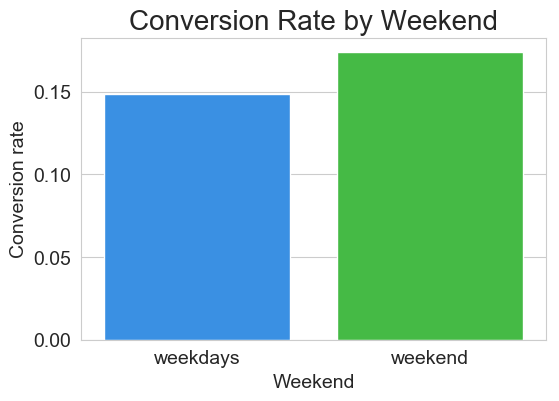

In [101]:
plt.figure(figsize=(6,4), dpi = 100)
plt.title("Conversion Rate by Weekend", fontsize = 20)
color = ["dodgerblue", "limegreen"]
ax = sns.barplot(x="Weekend", y="Conversion rate", 
            data=temp_wk, palette = color)
ax.set_xticklabels(["weekdays","weekend"])

### TrafficType vs Revenue 

#### Conversion vs TrafficType 

In [458]:
traff_total= df.groupby("TrafficType").Revenue_t.count()
traff_tran = df.query("Revenue_t == 1").groupby("TrafficType").count().Revenue_t
traff_conv = round(traff_tran / traff_total,2)
temp_traff = pd.concat([traff_total,traff_tran,traff_conv],axis = 1).reset_index()
temp_traff.columns = ["Traffic","Total_session", "Transactions","Conversion rate"]

In [478]:
temp_traff.sort_values(by = "Conversion rate",ascending = False)

,Traffic,Total_session,Transactions,Conversion rate
15,16,3,1.0,0.33
6,7,40,12.0,0.30
7,8,343,95.0,0.28
19,20,198,50.0,0.25
1,2,3913,847.0,0.22
4,5,260,56.0,0.22
9,10,450,90.0,0.20
10,11,247,47.0,0.19
3,4,1069,165.0,0.15
13,14,13,2.0,0.15


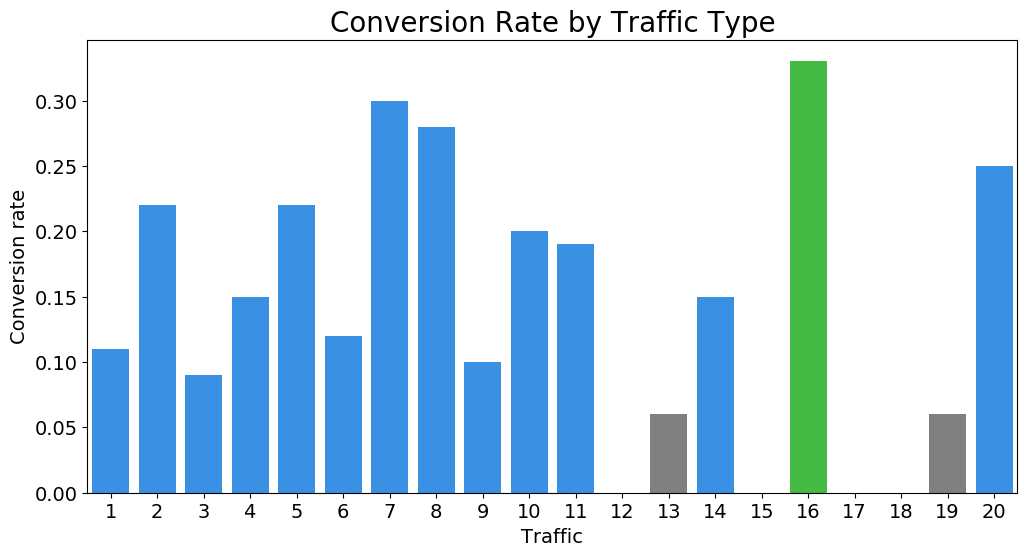

In [461]:
plt.figure(figsize=(12,6), dpi = 100)
plt.title("Conversion Rate by Traffic Type", fontsize = 20)
colors = ['limegreen' if x == max(temp_traff['Conversion rate']) else 'gray' if x == min(temp_traff['Conversion rate']) else 'dodgerblue' for x in temp_traff['Conversion rate']]
sns.barplot(x="Traffic", y="Conversion rate", 
            data=temp_traff, palette = colors)
# plt.axhline(y=temp_traff['Conversion rate'].mean(), color='darkorange',linewidth = 1.5, linestyle='--', label='mean')

# plt.legend()

### OperatingSystems vs Revenue

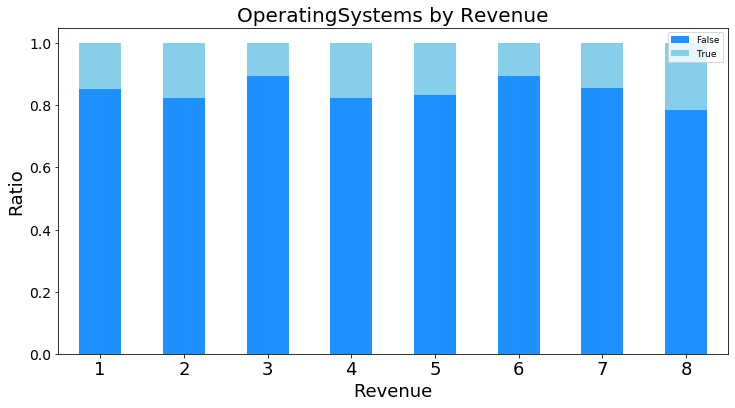

In [374]:
bivar(df, "OperatingSystems", "Revenue")

### Browser  vs Revenue

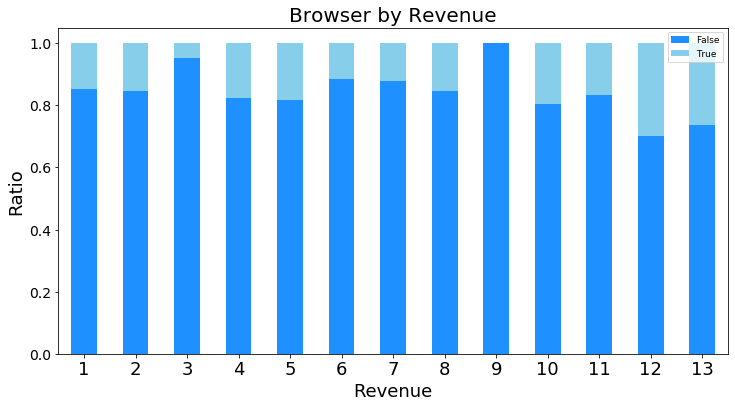

In [375]:
bivar(df, "Browser", "Revenue") 

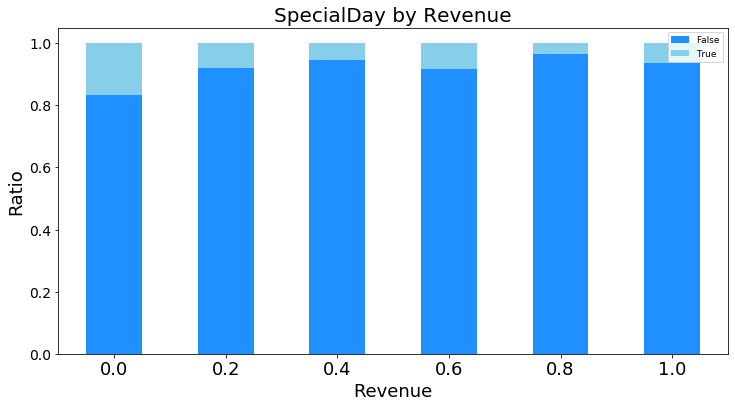

In [376]:
bivar(df, "SpecialDay", "Revenue") 

## Numerical Variables vs Revenue

### Helper functions

In [412]:
def create_plots(y_name, data, plt_type, log=False):
    y = data[y_name]
    if plt_type == 'violin':
        if log:
            sns.violinplot(y=y.apply(lambda x: math.log(x+1)), x="Revenue", data=data, colors = color)
        else:
            sns.violinplot(y=y, x="Revenue", data=data)
    elif plt_type == 'boxplot':
        if log:
            sns.boxplot(y=y.apply(lambda x: math.log(x+1)), x="Revenue", data=data)
        else:
            sns.boxplot(y=y, x="Revenue", data=data)

### Page Related Features

#### Administrative /  Informational /  ProductRelated

In [463]:
page_var = ["Administrative","Informational","ProductRelated"]
page_count = df[page_var].groupby(df.Revenue).mean()
page_count

,Administrative,Informational,ProductRelated
Revenue,,,
False,2.117732,0.451833,28.714642
True,3.393606,0.786164,48.210168


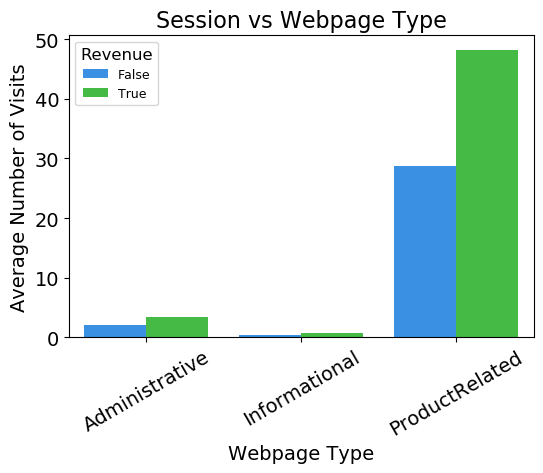

In [469]:
plt.figure(figsize=(6, 4), dpi=100)
color = ["dodgerblue","limegreen"]
page_count_plt = pd.melt(page_count.reset_index(), id_vars='Revenue',
                         var_name="Webpage Type", value_name="Average Number of Visits")
page_count_plt["Webpage Type"] = page_count_plt["Webpage Type"].astype(str)
sns.barplot(x="Webpage Type", y="Average Number of Visits", hue="Revenue", 
            data=page_count_plt, palette = color)
plt.xticks(rotation=30)
plt.title("Session vs Webpage Type")
plt.show()

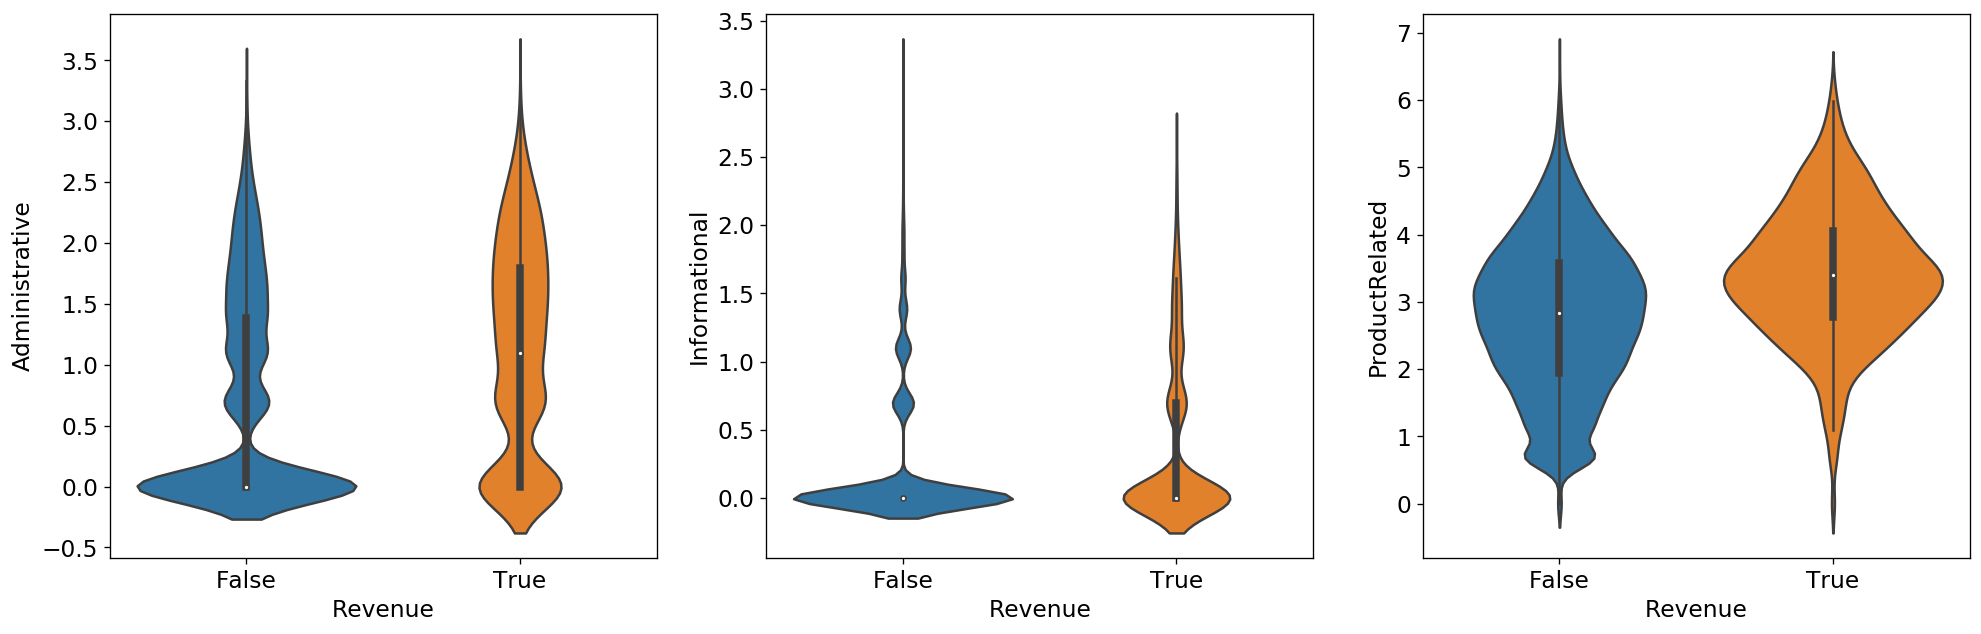

In [409]:
plt.figure(figsize=(20,6), dpi=120)

plt.subplot(1,3,1)
create_plots(y_name="Administrative", data=df, plt_type="violin", color = "Red", log=True)
plt.subplot(1,3,2)
create_plots(y_name="Informational", data=df, plt_type="violin",color = "Red", log=True)
plt.subplot(1,3,3)
create_plots(y_name="ProductRelated", data=df, plt_type="violin",color = "Red", log=True)

plt.show()

####  Administrative_Duration , Informational_Duration , ProductRelated_Duration

In [465]:
page_var = ["Administrative_Duration","Informational_Duration","ProductRelated_Duration"]
page_time = df[page_var].groupby(df.Revenue).mean()
page_time

,Administrative_Duration,Informational_Duration,ProductRelated_Duration
Revenue,,,
False,73.740111,30.236237,1069.987809
True,119.483244,57.611427,1876.209615


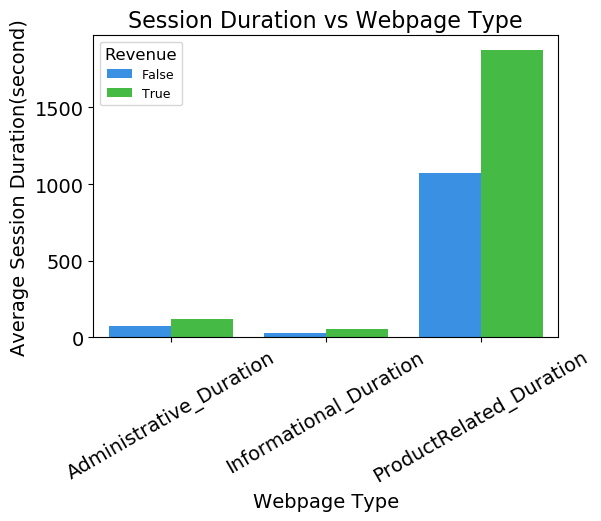

In [474]:
plt.figure(figsize=(6, 4), dpi=100)
color = ["dodgerblue","limegreen"]
page_time_plt = pd.melt(page_time.reset_index(), id_vars='Revenue',
                         var_name="Webpage Type", value_name="Average Session Duration(second)")
page_count_plt["Webpage Type"] = page_count_plt["Webpage Type"].astype(str)
sns.barplot(x="Webpage Type", y="Average Session Duration(second)", hue="Revenue", 
            data=page_time_plt, palette = color)
plt.xticks(rotation=30)
plt.title("Session Duration vs Webpage Type")
plt.show()

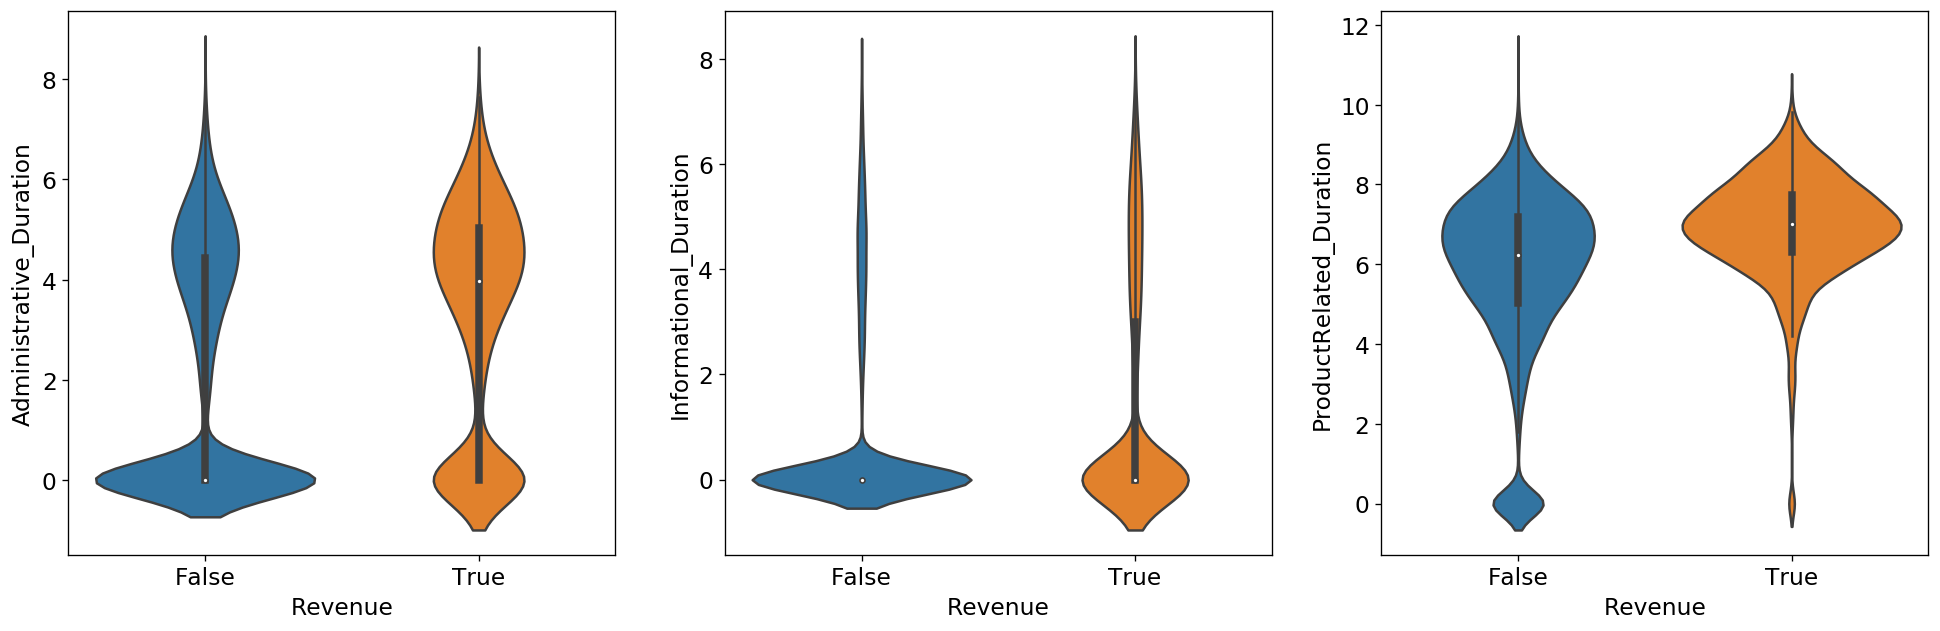

In [405]:
plt.figure(figsize=(20,6), dpi=120)

plt.subplot(1,3,1)
create_plots(y_name="Administrative_Duration", data=df, plt_type="violin", log=True)
plt.subplot(1,3,2)
create_plots(y_name="Informational_Duration", data=df, plt_type="violin", log=True)
plt.subplot(1,3,3)
create_plots(y_name="ProductRelated_Duration", data=df, plt_type="violin", log=True)

plt.show()

### Google Analytics Relate Features

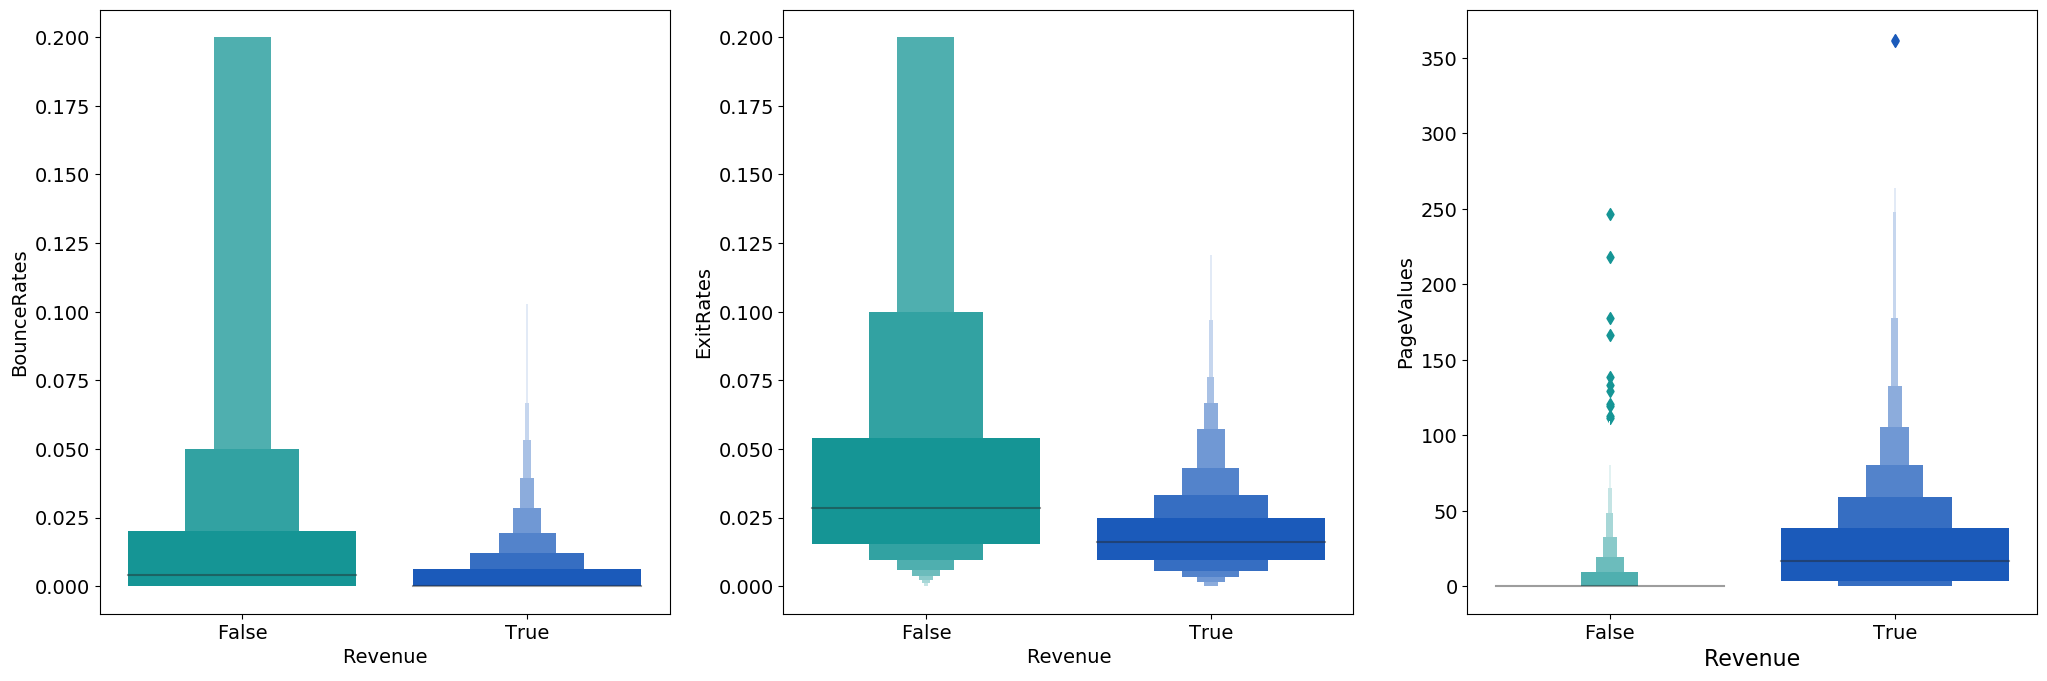

In [455]:
plt.figure(figsize=(25, 8), dpi=100)
plt.subplot(1,3,1)
sns.boxenplot(df['Revenue'], df["BounceRates"], palette = "winter_r")
plt.subplot(1,3,2)
sns.boxenplot(df['Revenue'], df["ExitRates"], palette = "winter_r")
# create_plots(y_name="ExitRates", data=df, plt_type="boxplot", log=False)
plt.subplot(1,3,3)
sns.boxenplot(df['Revenue'], df["PageValues"], palette = "winter_r")
plt.xlabel('Revenue', fontsize = 16)
plt.show()

### Bivar Distributions

#### Administrative 

#### Helper function 

In [106]:
def c_distribution(data, col_name, title):
    facet = sns.FacetGrid(data, hue= "Revenue",aspect=4)
    facet.map(sns.kdeplot,col_name,shade= True)
    facet.set(xlim=(0, data[col_name].max()))
    plt.subplots_adjust(top=0.9)
    facet.fig.suptitle(title)
    facet.add_legend()

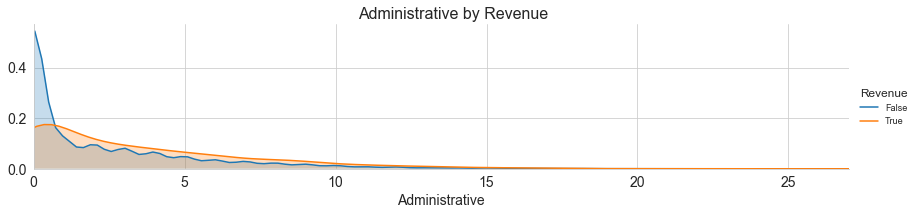

In [107]:
c_distribution(df,"Administrative","Administrative by Revenue")

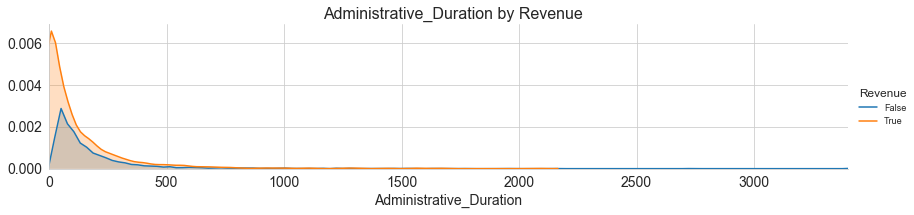

In [108]:
c_distribution(df,"Administrative_Duration","Administrative_Duration by Revenue")

####  Informational     

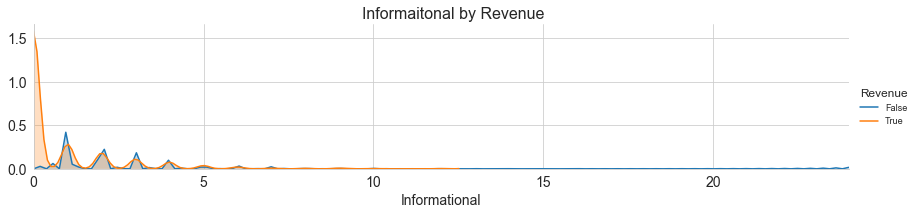

In [109]:
c_distribution(df,"Informational","Informaitonal by Revenue")    

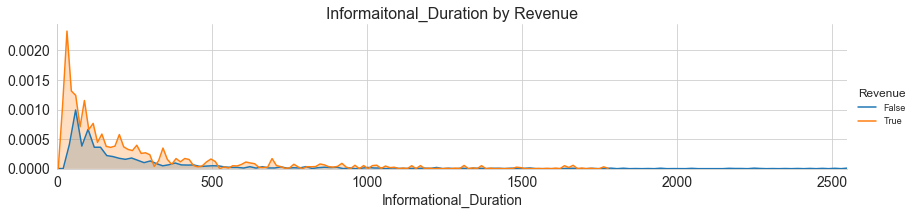

In [116]:
c_distribution(df,"Informational_Duration","Informaitonal_Duration by Revenue")    

####  Product-Related

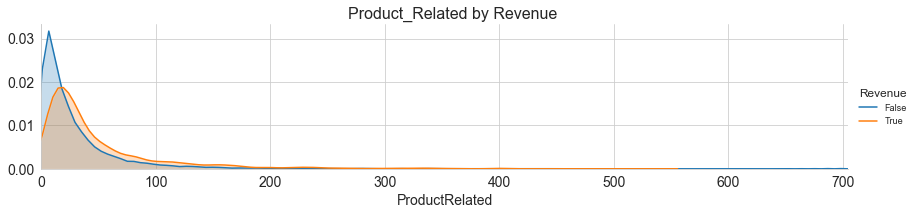

In [115]:
c_distribution(df,"ProductRelated","Product_Related by Revenue")  

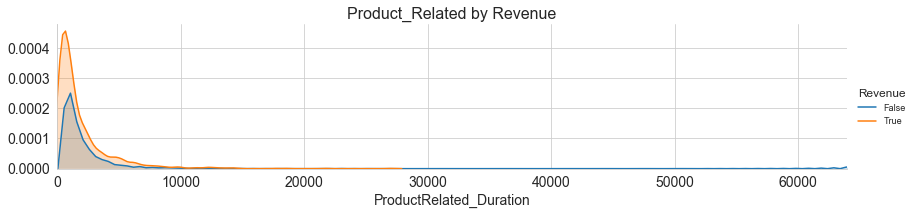

In [111]:
c_distribution(df,"ProductRelated_Duration","Product_Related by Revenue")  

#### BounceRates

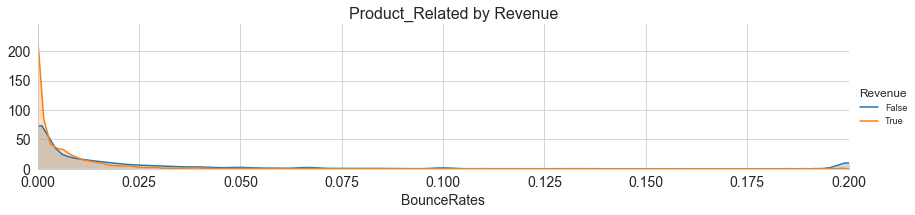

In [112]:
c_distribution(df,"BounceRates","Product_Related by Revenue")

#### ExitRates

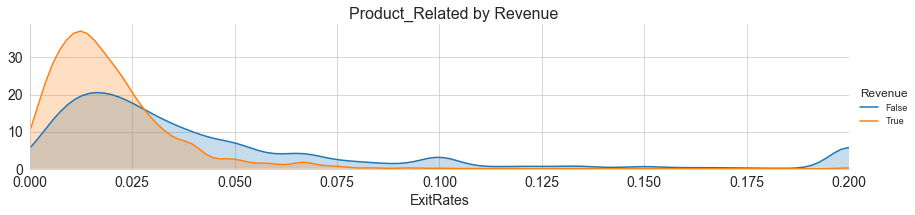

In [113]:
c_distribution(df,"ExitRates","Product_Related by Revenue")

#### PageValues

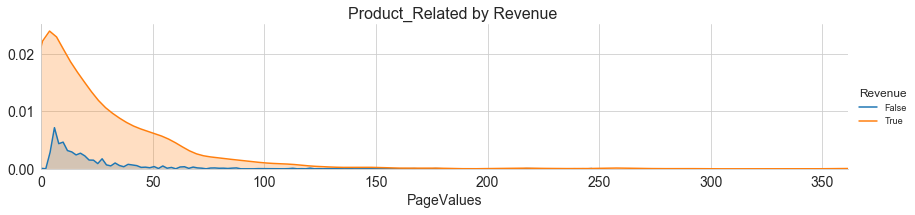

In [114]:
c_distribution(df,"PageValues","Product_Related by Revenue")

### Special Day vs Month

In [385]:
df.SpecialDay.groupby([df.Month]).count()

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
Name: SpecialDay, dtype: int64

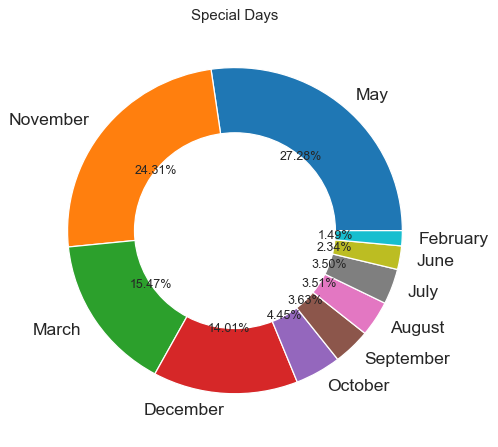

In [119]:
# plotting a pie chart for share of special days
plt.figure(figsize= (6,6), dpi= 90)
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
# colors = ['', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size,labels = labels, explode = explode, shadow = False, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 12)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')


plt.show()

### Normality

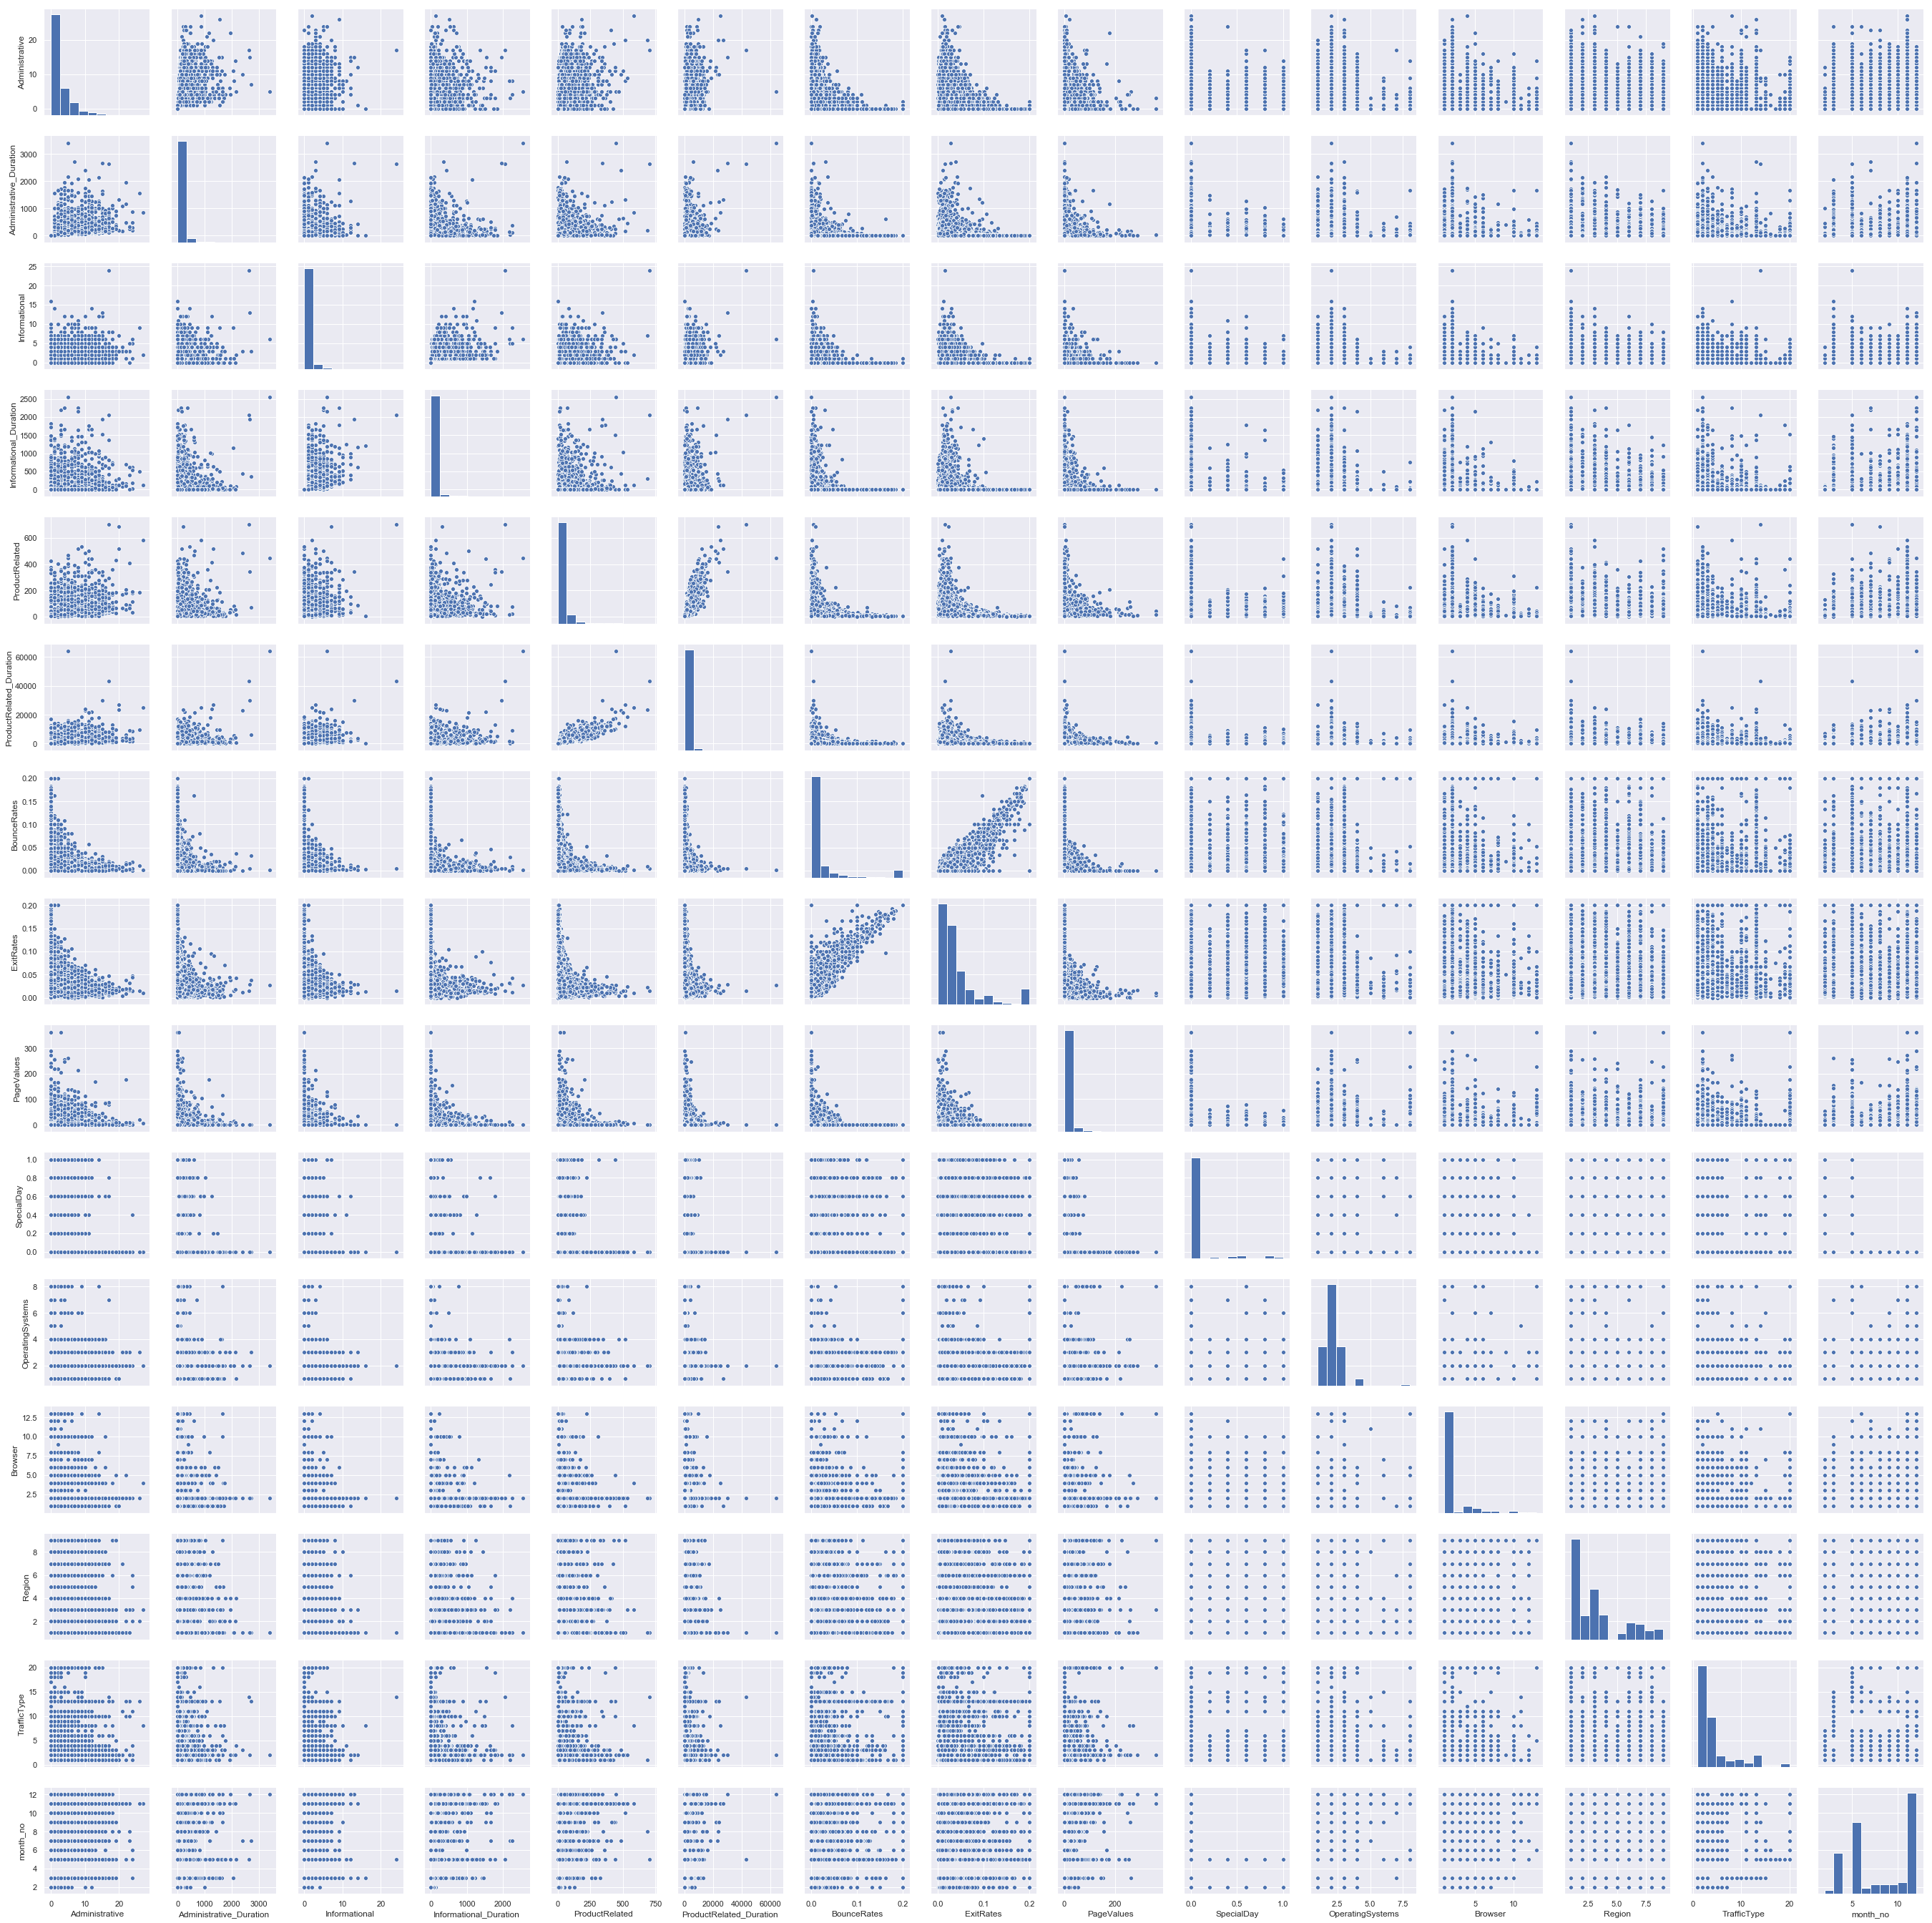

In [119]:
s1_column = [i for i in df.columns if df[i].dtype == "int" or df[i].dtype == "float"]
sns.set()
sns.pairplot(df[s1_column], size = 2.5)
plt.show()

# Multivariate Analysis

## VisitorType vs PageValues vs Revenue

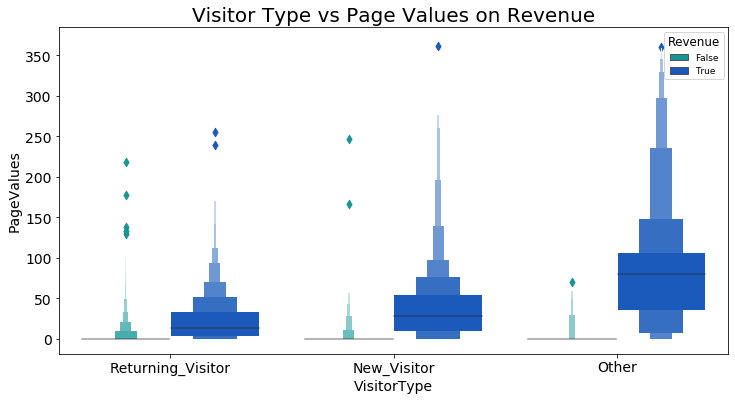

In [485]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.boxenplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'winter_r')
plt.title('Visitor Type vs Page Values on Revenue', fontsize = 20)
plt.show()

## Cluster Analysis

In [501]:
x = df.iloc[:, [5, 6]].values
x.shape

(12330, 2)

In [497]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


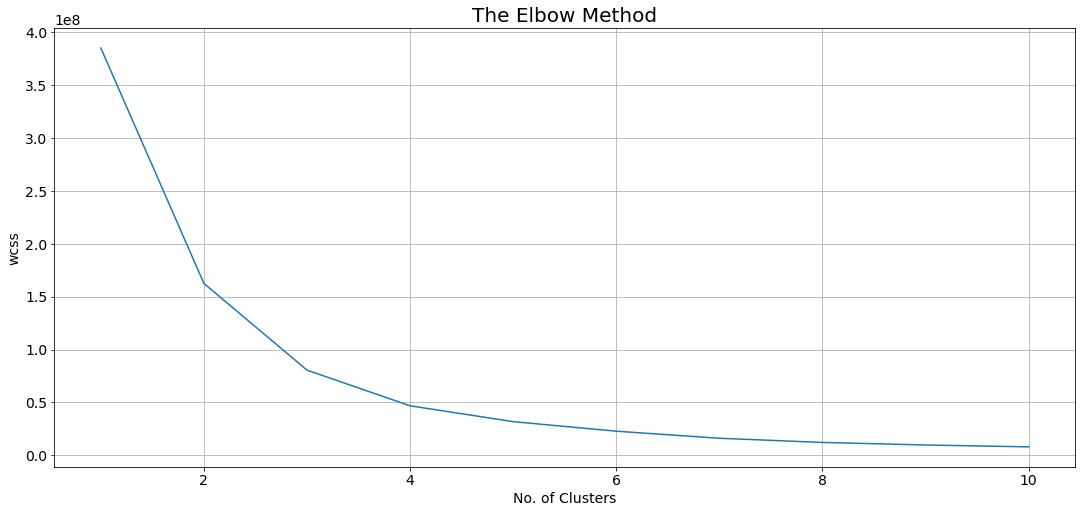

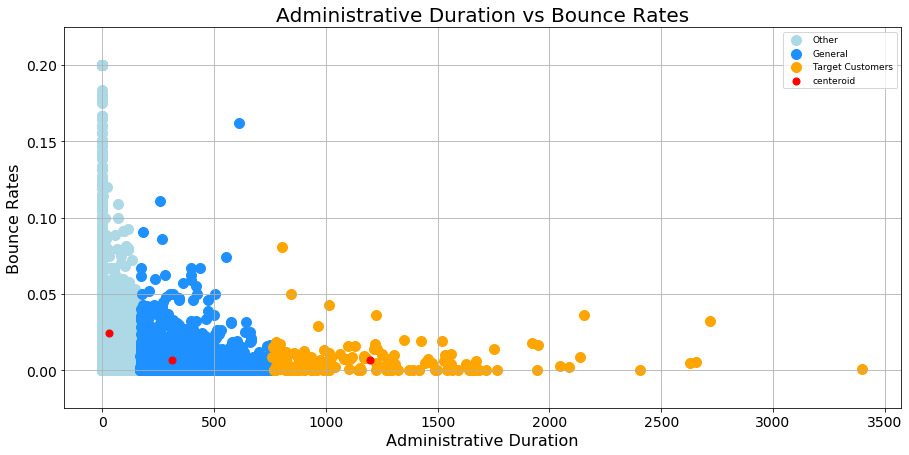

In [516]:
x = df.iloc[:, [1, 6]].values
x.shape


from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'lightblue' ,label = 'Other')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = "dodgerblue", label = "General")
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'orange', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'red' , label = 'centeroid')

plt.title('Administrative Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration', fontsize = 16)
plt.ylabel('Bounce Rates', fontsize = 16)
plt.legend()
plt.show()

# Data Processing 

![image](./dataprocessing.png)


In [ ]:
path = "./dataprocessing.png"

### One-Hot Encoding: VisitorType, Month, and Weekend, Region, OperatingSystems, Browser, TrafficType

In [48]:
dfDummies = pd.get_dummies(df, columns = ["VisitorType", "Month", "Weekend","Region","OperatingSystems", "Browser", "TrafficType"])
dfDummies1 = pd.get_dummies(df, columns = ["VisitorType", "Month", "Weekend"])

### Label Encoding: Revenue 

In [54]:
label = preprocessing.LabelEncoder()
dfDummies["Revenue"]  = label.fit_transform(dfDummies["Revenue"])
dfDummies1["Revenue"] = label.fit_transform(dfDummies1["Revenue"])

### Standarlization: Numerical Variables

In [62]:
def standardize(data):
    return ((data - np.mean(data, axis = 0)) / np.std(data, axis = 0))

def standscale(df, col_name):
    for c in col_name:
        df[c] = standardize(df[c])
    return df 

In [70]:
s1_column = [i for i in dfDummies.columns if dfDummies[i].dtype == "int" or dfDummies[i].dtype == "float"]

In [72]:
s2_column = s1_column[:10]

In [74]:
standscale(dfDummies, s2_column)
standscale(dfDummies1, s2_column)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekend_False,Weekend_True
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1,0,0,0,0,0,0,0,1,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,1,0,0,0,0,0,0,0,1,0
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,1,0,0,0,0,0,0,0,1,0
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,1,0,0,0,0,0,0,0,1,0
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,0,0,0,0,0,0,0,0,0,1
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,0,1
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,0,1
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,0,0,0,0,0,1,0,0,1,0


In [75]:
dfDummies.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,6.337149e-15,2.545792e-15,-4.988845e-15,-6.524118e-15,1.012194e-15,-7.757875e-16,3.420793e-15,1.570346e-14,3.266658e-15,-1.698737e-14,...,0.020032,0.000081,0.059854,0.001054,0.003082,0.000243,0.000081,0.000811,0.001379,0.016058
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,...,0.140117,0.009006,0.237226,0.032455,0.055432,0.015597,0.009006,0.028468,0.037107,0.125705
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-5.560920e-01,-5.281214e-01,-4.576830e-01,-5.923930e-01,-3.171778e-01,-3.088214e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.959377e-01,-4.147639e-01,-3.964779e-01,-2.449305e-01,-3.087548e-01,-3.113566e-01,-3.934903e-01,-3.686913e-01,-3.171778e-01,-3.088214e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.072280e-01,7.035981e-02,-3.964779e-01,-2.449305e-01,1.409492e-01,1.407881e-01,-1.109348e-01,1.425510e-01,-3.171778e-01,-3.088214e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.431499e+00,1.876956e+01,1.849960e+01,1.786868e+01,1.513858e+01,3.280678e+01,3.667189e+00,3.229316e+00,1.916634e+01,4.718598e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dfDummies.to_csv("processed_data")

## Correlation

(30.0, 0.0)

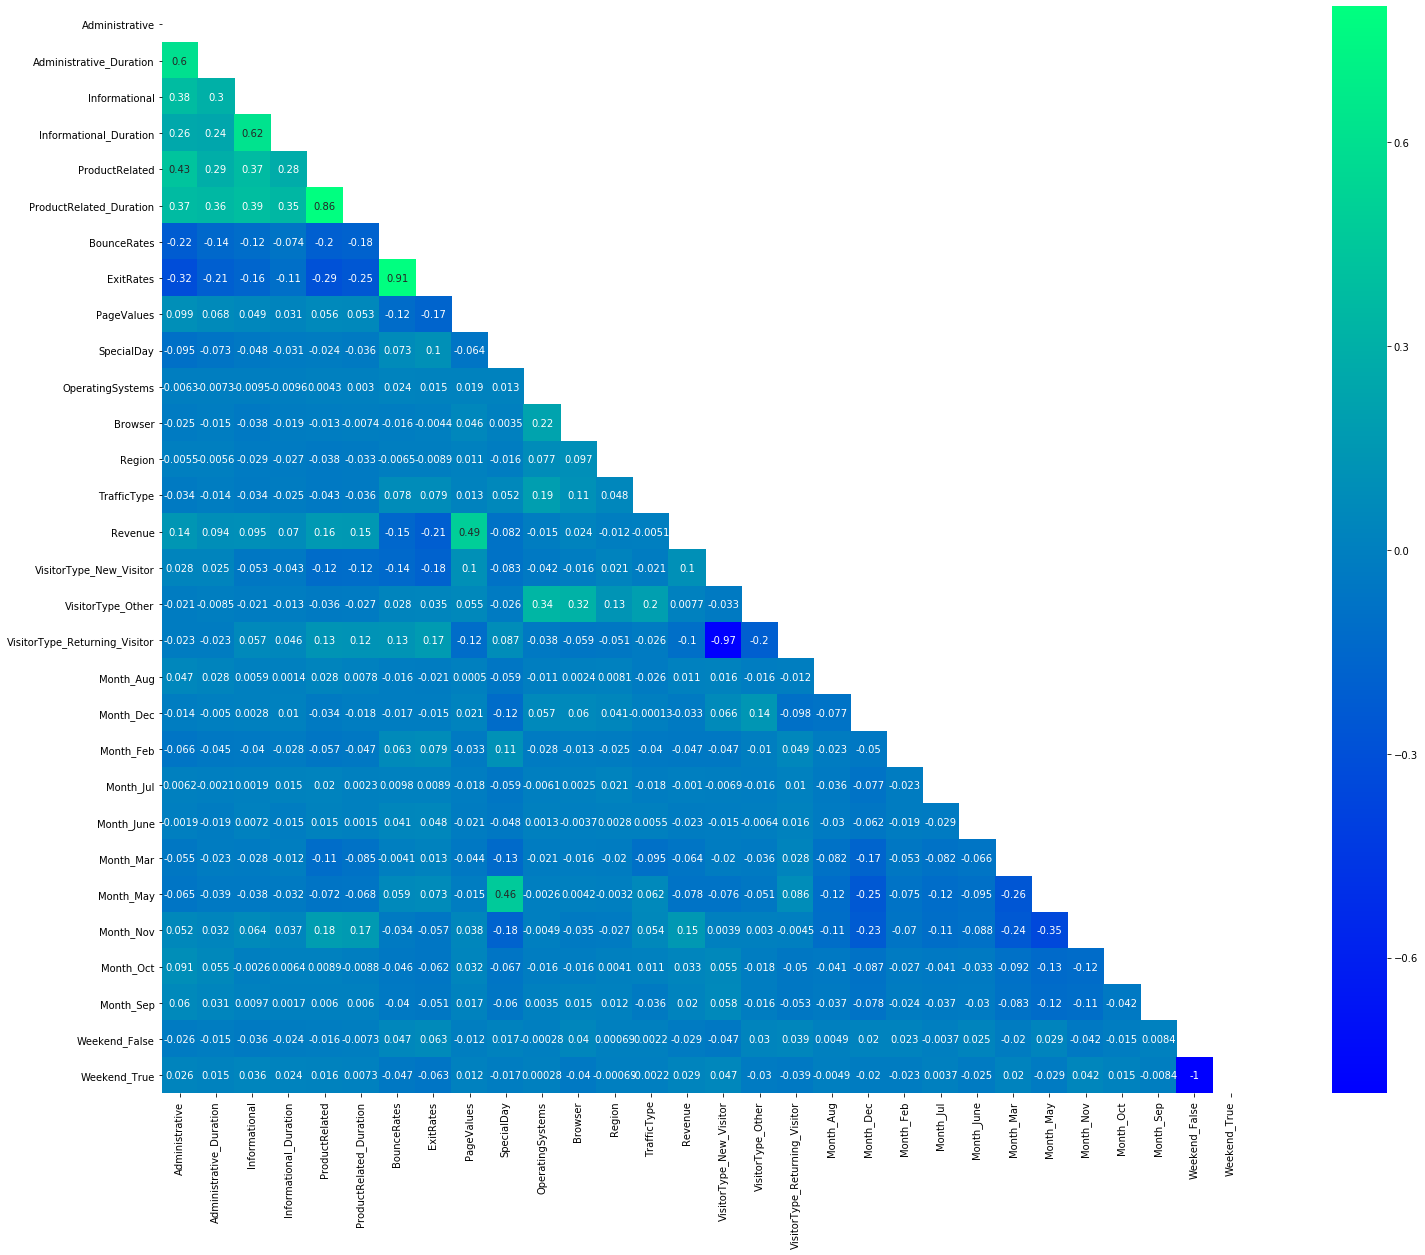

In [76]:
cor = dfDummies1.corr()
matrix = np.triu(cor)
plt.figure(figsize=(30,20))
ax = sns.heatmap(cor, annot=True,  vmin = -0.8, vmax = 0.8, center = 0,square = True, fmt = '.2g', mask=matrix, cmap = 'winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Reference: 
[1] [seaborn plots] https://seaborn.pydata.org/tutorial/distributions.html